<a href="https://colab.research.google.com/github/Elimirage/digital_image_processing_24vvim1/blob/main/lab5/LB5_DIL_Yumaeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

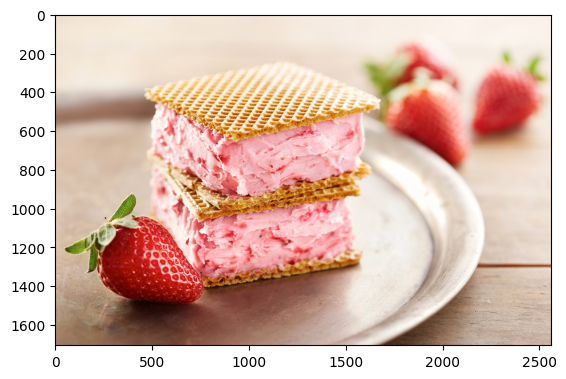

In [ ]:
image = cv.imread('/content/K47ZVgPhnc2pL5Ph9oDQwXiYSFkjyNhZaJ8YfOWuLBoA5NVgCp3zV1DSc00EwT-v0pgjecCri9QCBw326g_3mrWR.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [ ]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [ ]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
def segment_image(image):

    # Convert the image into HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

    # Set the blue range

    '''lower_green = (22, 50, 0)
    upper_green = (85, 255, 255)

    # Apply the blue mask
    mask = cv.inRange(hsv_image, lower_green, upper_green)
    '''
    # Set a white range
    light_red =  (177, 150, 0)
    upper_red =(255, 255, 255)

    # Apply the white mask
    mask_red = cv.inRange(hsv_image, light_red, upper_red)

    lower_red1 = (0, 150, 80)
    upper_red1 = (5, 255, 255)
    mask_red1 = cv.inRange(hsv_image, lower_red1, upper_red1)
    # Combine the two mask
    # Set the blue range
    lower_blue =  (20, 30, 200)
    upper_blue = (27, 80, 255)

    # Apply the blue mask
    mask1 = cv.inRange(hsv_image, lower_blue, upper_blue)
    blur = cv.GaussianBlur(image, (17, 27), 0)
    final_mask =  mask_red + mask_red1+mask1
    result = cv.bitwise_and(blur, blur, mask=final_mask)

    # Clean up the segmentation using a blur

    kernel = np.ones((2,2), np.uint8)

    eroded_image = cv.erode(result, kernel, iterations=5)
    # Сохранить или отобразить результат



    return result
    #найти компонент связности

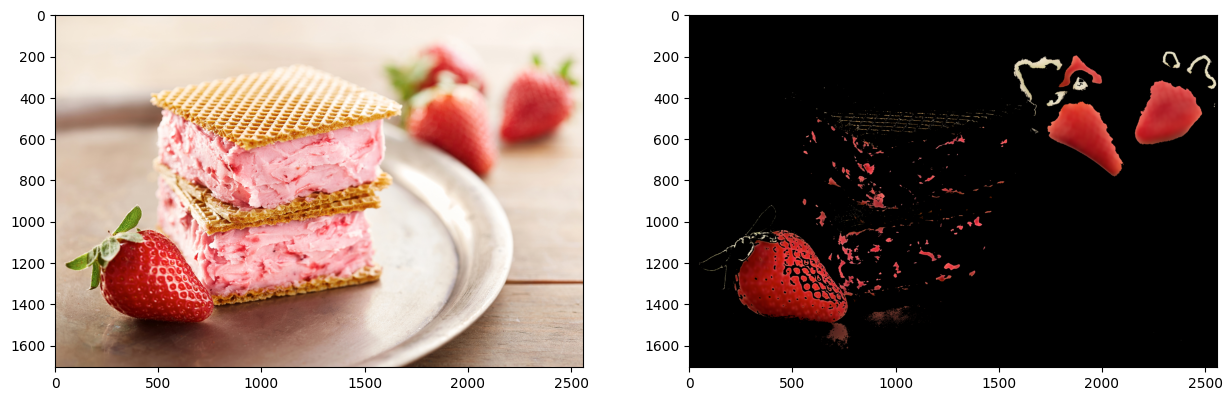

In [ ]:
result = segment_image(image_rgb)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [ ]:
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(cv.cvtColor(result, cv.COLOR_RGB2GRAY), 8, cv.CV_32S)

print(f"Number of connected components: {num_labels}")

# You can further process 'labels', 'stats', and 'centroids' to analyze each component.
# For example, 'stats' contains the area, bounding box, and centroid for each component.
# 'centroids' contains the x, y coordinates of the centroid for each component.

Number of connected components: 1909


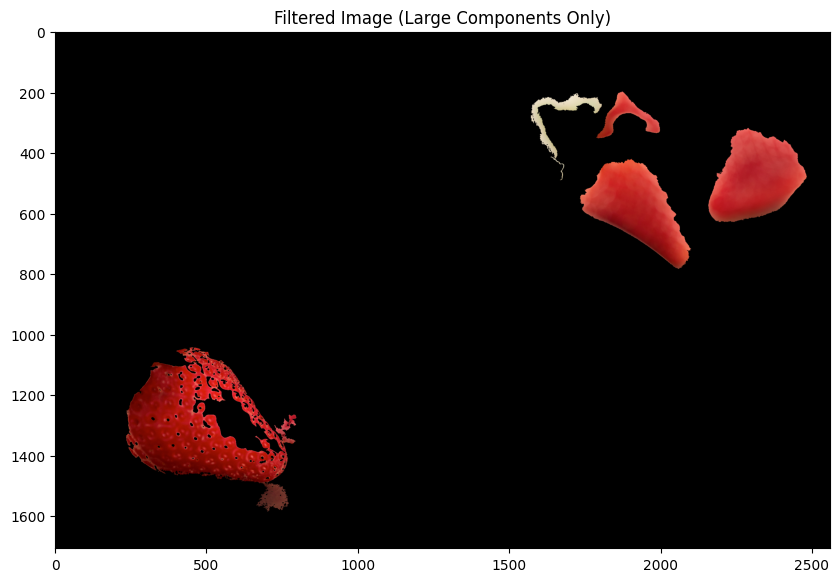

In [ ]:
# Define a minimum area threshold
min_area = 6910 # You can adjust this value

# Create a new image to store the filtered components
filtered_mask = np.zeros_like(labels, dtype=np.uint8)

# Iterate through each component (excluding the background)
for i in range(1, num_labels):
    # Get the area of the current component
    area = stats[i, cv.CC_STAT_AREA]

    # If the area is greater than the minimum threshold, add it to the filtered mask
    if area > min_area:
        filtered_mask[labels == i] = 255

# Apply the filtered mask to the original image
filtered_image = cv.bitwise_and(image_rgb, image_rgb, mask=filtered_mask)

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image)
plt.title("Filtered Image (Large Components Only)")
plt.show()

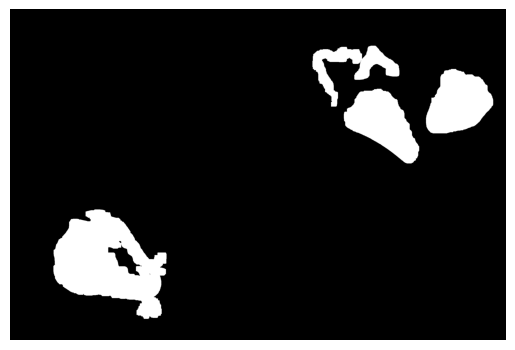

(<matplotlib.image.AxesImage at 0x7cdcec8199d0>,
 (np.float64(-0.5), np.float64(2559.5), np.float64(1705.5), np.float64(-0.5)),
 None)

In [ ]:
k = np.ones((23, 23), np.uint8) # Define 3x3 kernel
out = cv.dilate(filtered_mask, k,6)
plt.imshow(out, cmap='gray'), plt.axis('off'), plt.show()


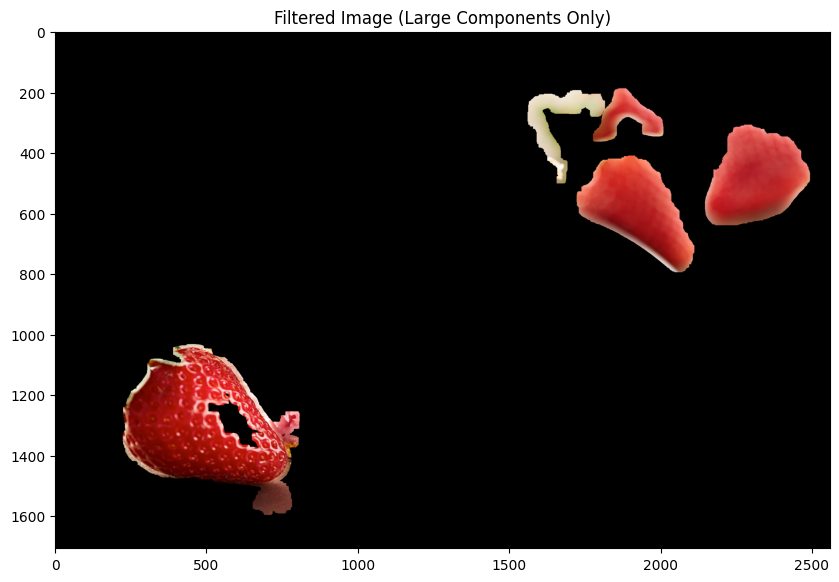

In [ ]:
filtered_image = cv.bitwise_and(image_rgb, image_rgb, mask=out)

# Display the filtered image
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image)
plt.title("Filtered Image (Large Components Only)")
plt.show()